<a href="https://colab.research.google.com/github/Rushabh2499/CodersWeek-ML/blob/master/ML_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is a discrete classification

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

importing dataset using wget

In [0]:
!wget http://iali.in/datasets/Social_Network_Ads.csv

--2020-06-02 15:47:07--  http://iali.in/datasets/Social_Network_Ads.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2020-06-02 15:47:07 (111 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



Or import value to dataset using panda variable

In [0]:
dataset = pd.read_csv("http://iali.in/datasets/Social_Network_Ads.csv")

To check if dataset has been imported, use describe() or sample()

In [0]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [0]:
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
173,15581654,Female,34,43000,0


In [0]:
dataset.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
183,15603319,Male,33,43000,0
47,15776348,Female,27,54000,0
29,15669656,Male,31,18000,0
307,15733973,Female,47,113000,1
381,15670615,Male,48,33000,1
312,15733964,Female,38,50000,0
2,15668575,Female,26,43000,0
118,15642725,Male,40,59000,0
271,15688172,Female,59,76000,1


Add values to x and y. Either use dataset or iloc.

Syntax of iloc

iloc [ Row_start: Row_end , Col_Start: Col_end]

In [0]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

Split data into training and testing. Use sklearn library.

Syntax: train_test_split(x,y,split-size)

0.2 = 80-20

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Building the model and visualizing the tree.

Use this for reference:https://scikit-learn.org/stable/modules/tree.html#classification


In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

[Text(186.23250000000002, 210.645, 'X[0] <= 43.5\ngini = 0.455\nsamples = 320\nvalue = [208, 112]'),
 Text(117.18, 197.055, 'X[1] <= 91500.0\ngini = 0.278\nsamples = 234\nvalue = [195, 39]'),
 Text(66.96000000000001, 183.465, 'X[0] <= 41.5\ngini = 0.078\nsamples = 196\nvalue = [188, 8]'),
 Text(50.220000000000006, 169.875, 'X[0] <= 36.5\ngini = 0.053\nsamples = 185\nvalue = [180, 5]'),
 Text(41.85000000000001, 156.285, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(58.59, 156.285, 'X[1] <= 83500.0\ngini = 0.158\nsamples = 58\nvalue = [53, 5]'),
 Text(50.220000000000006, 142.695, 'X[1] <= 67500.0\ngini = 0.131\nsamples = 57\nvalue = [53, 4]'),
 Text(41.85000000000001, 129.10500000000002, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(58.59, 129.10500000000002, 'X[1] <= 70500.0\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(50.220000000000006, 115.515, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(66.96000000000001, 115.515, 'X[0] <= 40.5\ngini = 0.191\nsamples = 2

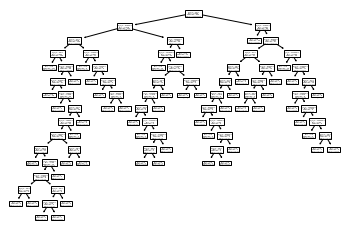

In [0]:
tree.plot_tree(clf)

In [0]:
y_pred = clf.predict(x_test)

In [0]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.8

Classification report - to test how good the model is

In [0]:
from sklearn.metrics import classification_report

classes = ['0','1']

classification_report(y_test, y_pred, target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.79      0.92      0.85        49\n           1       0.83      0.61      0.70        31\n\n    accuracy                           0.80        80\n   macro avg       0.81      0.77      0.78        80\nweighted avg       0.80      0.80      0.79        80\n'

Visualizing as actual vs predicted

In [0]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

df

,Actual,Predicted
0,0,0
1,1,0
2,0,1
3,0,0
4,1,1
...,...,...
75,0,0
76,0,0
77,0,1
78,1,0


Plotting bar graph to see how it looks

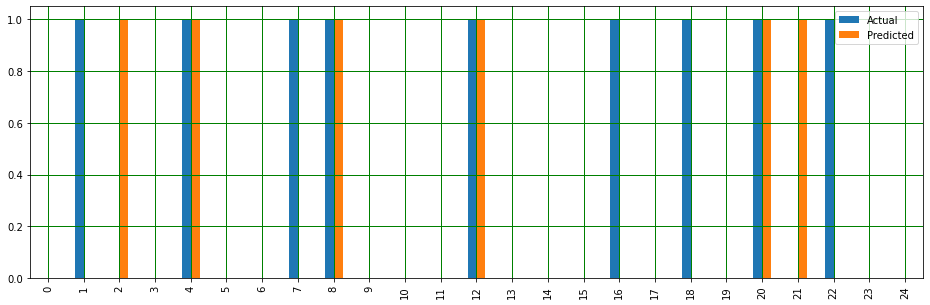

In [0]:
df1 = df.head(25)  # graph with top 25 rows of original data frame
df1.plot(kind='bar', figsize=(16,5))   #bargraph any values to make its size.
plt.grid(which='major', linestyle='-',linewidth='1', color='green')
plt.grid(which='minor', linestyle=':',linewidth='1', color='black')
plt.show()